In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
data_in= pd.read_csv('C:\\Users\\User\\desktop\\Datasets\\income(1).csv', na_values=[' ?'])

In [4]:
data=data_in.copy()

In [5]:
data.info


<bound method DataFrame.info of        age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White   

In [6]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [7]:
summary=data.describe() 

In [8]:
summary_cat=data.describe(include="O")

In [9]:
summary_cat

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [10]:
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
miss=data[data.isnull().any(axis=1)]

In [13]:
miss

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [16]:
data2=data.dropna(axis=0)

In [17]:
corr= data2.corr()
corr

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [18]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [19]:
gender=pd.crosstab(index =data2["gender"], columns='count',normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [20]:
gender_sal=pd.crosstab(index =data2["gender"], 
                       columns=data2['SalStat'],
                       margins=True,
                       normalize='index')
gender_sal

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


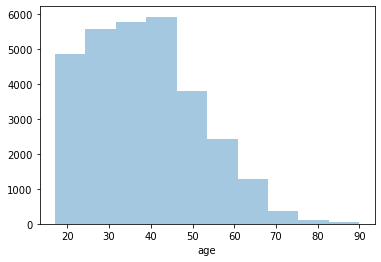

In [21]:
#x=sns.countplot(data2['SalStat'])
sns.distplot(data2['age'],bins=10,kde=False)


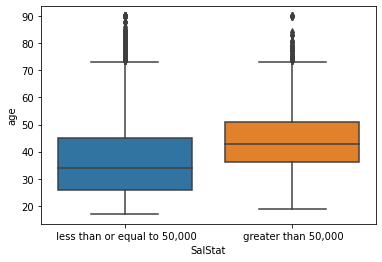

In [22]:
sns.boxplot('SalStat','age',data=data2)

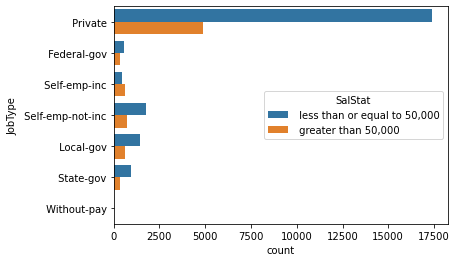

In [23]:
sns.countplot(y="JobType",data=data2,hue="SalStat")

In [25]:
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [26]:
new_data=pd.get_dummies(data2, drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
colu_list=list(new_data.columns)
colu_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [28]:
features=list(set(colu_list)-set(['SalStat']))
features 

['EdType_ 12th',
 'nativecountry_ Scotland',
 'hoursperweek',
 'EdType_ Bachelors',
 'nativecountry_ Mexico',
 'occupation_ Prof-specialty',
 'maritalstatus_ Never-married',
 'EdType_ Assoc-voc',
 'EdType_ Masters',
 'nativecountry_ England',
 'nativecountry_ Nicaragua',
 'JobType_ Self-emp-not-inc',
 'occupation_ Protective-serv',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'age',
 'race_ Asian-Pac-Islander',
 'relationship_ Own-child',
 'EdType_ Prof-school',
 'nativecountry_ Guatemala',
 'occupation_ Exec-managerial',
 'nativecountry_ India',
 'nativecountry_ Iran',
 'nativecountry_ Dominican-Republic',
 'JobType_ Self-emp-inc',
 'nativecountry_ Jamaica',
 'race_ Other',
 'EdType_ Assoc-acdm',
 'nativecountry_ Honduras',
 'nativecountry_ Hong',
 'nativecountry_ Germany',
 'nativecountry_ South',
 'occupation_ Sales',
 'nativecountry_ Ireland',
 'EdType_ HS-grad',
 'nativecountry_ Laos',
 'occupation_ Transport-moving',
 'maritalstatus_ Married-AF-spouse',
 'EdType_ 7th-8th',
 'Ed

In [29]:
y=new_data['SalStat'].values

In [30]:
x=new_data[features].values

In [31]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
test_x.size

850606

In [33]:
logistic=LogisticRegression()

In [34]:
logistic.fit(train_x,train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
logistic.intercept_

array([-1.04067075])

In [36]:
predict=logistic.predict(test_x)

In [37]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
conf=confusion_matrix(test_y, predict)

In [39]:
conf

array([[6291,  532],
       [ 946, 1280]], dtype=int64)

In [40]:
accuracy_score(test_y,predict)

0.8366670350314952

In [41]:
miss=(test_y!=predict).sum()

In [42]:
miss

1478

In [43]:
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [44]:
cols=['gender','nativecountry','race','JobType']
new_data=data2.drop(cols,axis=1)

In [45]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [46]:
col_list=list(new_data.columns)
col_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ N

In [47]:
features=list(set(col_list)-set(['SalStat']))

In [48]:
features

['EdType_ 12th',
 'occupation_ Craft-repair',
 'occupation_ Farming-fishing',
 'hoursperweek',
 'EdType_ Bachelors',
 'relationship_ Other-relative',
 'occupation_ Prof-specialty',
 'occupation_ Handlers-cleaners',
 'maritalstatus_ Widowed',
 'EdType_ Some-college',
 'maritalstatus_ Never-married',
 'EdType_ Assoc-voc',
 'EdType_ Masters',
 'relationship_ Wife',
 'occupation_ Protective-serv',
 'age',
 'capitalloss',
 'maritalstatus_ Separated',
 'EdType_ Prof-school',
 'relationship_ Own-child',
 'occupation_ Tech-support',
 'occupation_ Exec-managerial',
 'EdType_ 9th',
 'capitalgain',
 'maritalstatus_ Married-spouse-absent',
 'EdType_ Assoc-acdm',
 'relationship_ Unmarried',
 'EdType_ 5th-6th',
 'occupation_ Other-service',
 'EdType_ 11th',
 'relationship_ Not-in-family',
 'occupation_ Sales',
 'EdType_ HS-grad',
 'maritalstatus_ Married-AF-spouse',
 'EdType_ 1st-4th',
 'EdType_ 7th-8th',
 'occupation_ Machine-op-inspct',
 'occupation_ Priv-house-serv',
 'EdType_ Preschool',
 'occup

In [78]:
y=new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
x=new_data[features].values
x

array([[ 0,  0,  0, ...,  0, 45,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  0,  0, ...,  1, 44,  0],
       ...,
       [ 0,  0,  0, ...,  1, 23,  0],
       [ 0,  0,  0, ...,  1, 42,  0],
       [ 0,  0,  0, ...,  0, 29,  0]], dtype=int64)

In [80]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [81]:
logistic.fit(train_x,train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
pred=logistic.predict(test_x)

In [86]:
accu=accuracy_score(test_y,pred)
accu

0.8357829594430324

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
import matplotlib.pyplot as plt

In [91]:
KNK_C=KNeighborsClassifier(n_neighbors=5)

In [93]:
KNK_C.fit(train_x,train_y)

KNeighborsClassifier()

In [96]:
pred=KNK_C.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
confu=confusion_matrix(test_y,pred)
confu

array([[6185,  638],
       [ 866, 1360]], dtype=int64)

In [103]:
acc=accuracy_score(test_y,pred)
acc

0.8337937893689911

In [107]:
miss1=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    miss1.append((test_y!=pred_i).sum())

In [108]:
miss1

[1714,
 1507,
 1572,
 1475,
 1504,
 1431,
 1465,
 1450,
 1456,
 1423,
 1473,
 1452,
 1454,
 1434,
 1449,
 1440,
 1441,
 1422,
 1446]